In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from os import path
import glob
sns.set_style('white')
#color_scheme = {"Fed": "#648fff","Starved":"#fe6100" }
color_scheme = {"Fed": "dodgerblue","Starved": "darkorange"}

In [2]:
sample_list = pd.read_csv("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/sample_list.csv",sep=",",header=0)
hemocyte_coordinates = pd.read_csv("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/results/hemocyte_coordinates.csv", sep="\t",header=0)
abdomen_coordinates = pd.read_csv("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/results/abdomen_coordinates.csv", sep="\t",header=0) 
figure_outputs = "/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/results/"

In [3]:
#Add experimental group info to hemocyte detections
image_condition = pd.Series(abdomen_coordinates.condition.values, index=abdomen_coordinates.Image).to_dict()
hemocyte_coordinates['condition'] = hemocyte_coordinates['Image'].map(image_condition)

In [4]:
delauney_metrics = hemocyte_coordinates[['Image','condition','Delaunay: Num neighbors',
                                         'Delaunay: Mean distance', 'Delaunay: Median distance',
                                         'Delaunay: Max distance', 'Delaunay: Min distance',
                                         'Delaunay: Mean triangle area', 'Delaunay: Max triangle area']]
                                        

<Axes: xlabel='Delaunay: Num neighbors', ylabel='Count'>

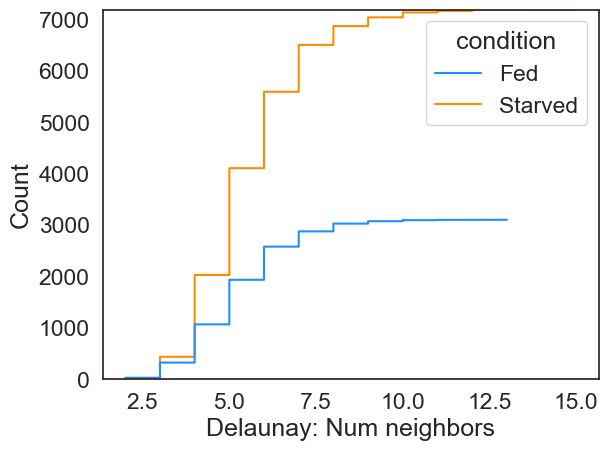

In [19]:
sns.set(font_scale=1.5)
sns.set_style("white")
sns.ecdfplot(data=delauney_metrics, x='Delaunay: Num neighbors', hue='condition', palette=color_scheme, stat='count')
 

/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_32165/1193904076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delauney_metrics['log_mean_triangle_area'] = np.log10(delauney_metrics['Delaunay: Mean triangle area'])


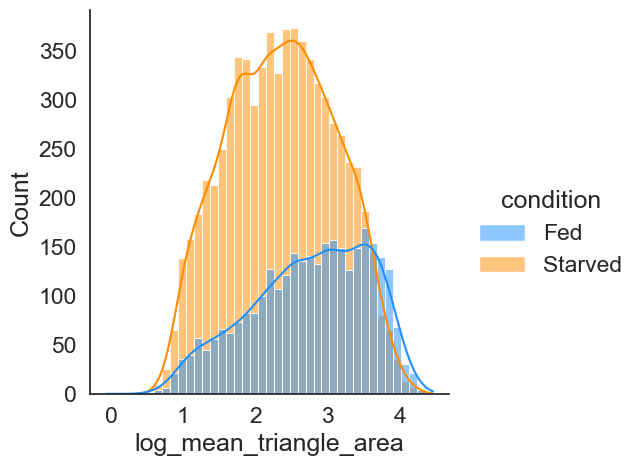

In [23]:

delauney_metrics['log_mean_triangle_area'] = np.log10(delauney_metrics['Delaunay: Mean triangle area'])
sns.displot(data=delauney_metrics, x='log_mean_triangle_area', hue='condition', palette=color_scheme, stat='count', kde=True)


In [11]:

delauney_metrics['log_mean_triangle_area'] = np.log10(delauney_metrics['Delaunay: Mean triangle area'])
sns.displot(data=delauney_metrics, x='log_mean_triangle_area', hue='condition', palette=color_scheme, stat='count')

Index(['Image', 'condition', 'Delaunay: Num neighbors',
       'Delaunay: Mean distance', 'Delaunay: Median distance',
       'Delaunay: Max distance', 'Delaunay: Min distance',
       'Delaunay: Mean triangle area', 'Delaunay: Max triangle area',
       'log_mean_triangle_area'],
      dtype='object')

/var/folders/8k/y9p1gcl95112m767j4mf_jhh0000gn/T/ipykernel_32165/3558300426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delauney_metrics['log_mean_distance'] = np.log10(delauney_metrics['Delaunay: Mean distance'])


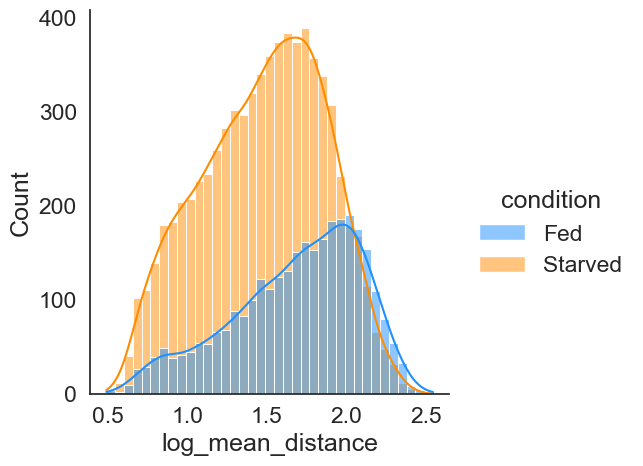

In [24]:
delauney_metrics['log_mean_distance'] = np.log10(delauney_metrics['Delaunay: Mean distance'])
sns.displot(data=delauney_metrics, x='log_mean_distance', hue='condition', palette=color_scheme, stat='count', kde=True)